In [60]:
!pip install pyreadstat
import pandas as pd
import pyreadstat

In [79]:
#membuka file Analisis Epidemiologi 
nama_file = '2023-Analisis Epidemiologi-Data3.sav'
df, meta = pyreadstat.read_sav(nama_file)
print(df.sample(3))

      no                nama  umur_1  sex      TB     BB  Palpasi    Hb  \
45  46.0           Rudiyanto   128.0  1.0  124.75  25.65      0.0  12.9   
5    6.0       Ade Mujiyanti    98.0  2.0  119.00  21.75      1.0  13.3   
16  17.0  Indah Putri Amalia   112.0  2.0  134.50  29.35      2.0  13.5   

     TSHs  Pestisida  
45   3.93        2.0  
5   16.22        2.0  
16   6.01        2.0  


In [80]:
df['Status_Hipotiroid'] = df['TSHs'].apply(lambda x: 'Hipotiroid' if x > 4.5 else 'Tidak Hipotiroid')
print(df.sample(3))

      no           nama  umur_1  sex      TB     BB  Palpasi    Hb  TSHs  \
3    4.0  Mahes Setyo M   127.0  1.0  135.95  44.75      0.0  14.9  3.13   
47  48.0     Rizka Dewi   130.0  2.0  134.35  28.85      1.0  13.4  3.02   
46  47.0  Rafika Amalia   129.0  2.0  116.80  21.00      2.0  14.1  1.23   

    Pestisida Status_Hipotiroid  
3         2.0  Tidak Hipotiroid  
47        2.0  Tidak Hipotiroid  
46        2.0  Tidak Hipotiroid  


In [81]:
df['Umur(Tahun)'] = df['umur_1'] /12
print(df.sample(5))

      no                nama  umur_1  sex     TB     BB  Palpasi    Hb   TSHs  \
14  15.0        Eka Julfania   126.0  2.0  128.1  30.15      2.0  13.7   5.42   
28  29.0          Nurul Amin   111.0  1.0  120.4  21.40      0.0  12.7   4.79   
16  17.0  Indah Putri Amalia   112.0  2.0  134.5  29.35      2.0  13.5   6.01   
13  14.0         Diana Putri   120.0  2.0  123.3  22.90      1.0  14.6  10.79   
19  20.0            Laeliyah   120.0  2.0  128.2  28.20      1.0  14.1   2.05   

    Pestisida Status_Hipotiroid  Umur(Tahun)  
14        1.0        Hipotiroid    10.500000  
28        1.0        Hipotiroid     9.250000  
16        2.0        Hipotiroid     9.333333  
13        1.0        Hipotiroid    10.000000  
19        2.0  Tidak Hipotiroid    10.000000  


In [82]:
df['Jenis_Kelamin'] = df['sex'].apply(lambda x: 'Laki-laki' if x < 1.5 else 'Perempuan')
print(df.sample(5))

      no            nama  umur_1  sex      TB     BB  Palpasi    Hb  TSHs  \
22  23.0   Mulia Alim MW   121.0  1.0  120.90  22.55      1.0  13.1  8.87   
45  46.0       Rudiyanto   128.0  1.0  124.75  25.65      0.0  12.9  3.93   
31  32.0  Nisa Ramadhani   110.0  2.0  118.30  21.00      0.0  13.3  2.97   
10  11.0  Dafid Bakhtiar   121.0  1.0  127.20  28.80      2.0  13.3  5.42   
37  38.0     Rofi Nurdin   112.0  1.0  124.90  25.05      2.0  12.6  7.70   

    Pestisida Status_Hipotiroid  Umur(Tahun) Jenis_Kelamin  
22        2.0        Hipotiroid    10.083333     Laki-laki  
45        2.0  Tidak Hipotiroid    10.666667     Laki-laki  
31        1.0  Tidak Hipotiroid     9.166667     Perempuan  
10        1.0        Hipotiroid    10.083333     Laki-laki  
37        2.0        Hipotiroid     9.333333     Laki-laki  


In [83]:
from scipy import stats

In [84]:
df['Status_Hipotiroid'] = df['Status_Hipotiroid'].map({'Tidak Hipotiroid': 0, 'Hipotiroid': 1})

In [85]:
df['Pestisida'] = df['Pestisida'].astype(int)
df['Status_Hipotiroid'] = df['Status_Hipotiroid'].astype(int)

In [86]:
import statsmodels.api as sm

# Menentukan variabel eksposur dan kejadian
eksposur = df['Pestisida']  # Variabel eksposur (pajanan pestisida)
kejadian = df['Status_Hipotiroid']  # Variabel kejadian (hipotiroid)

# Mengkodekan variabel eksposur sebagai variabel dummy
eksposur_dummies = pd.get_dummies(eksposur, drop_first=True)

# Menambahkan kolom konstanta ke data
eksposur_dummies = sm.add_constant(eksposur_dummies)

# Melakukan analisis regresi logistik
model = sm.Logit(kejadian, eksposur_dummies)
result = model.fit()

# Menampilkan hasil analisis
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.648071
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:      Status_Hipotiroid   No. Observations:                   48
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Jun 2023   Pseudo R-squ.:                 0.06386
Time:                        01:20:35   Log-Likelihood:                -31.107
converged:                       True   LL-Null:                       -33.229
Covariance Type:            nonrobust   LLR p-value:                   0.03939
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7885      0.539      1.462      0.144      -0.269       1.846
2             -1.2993      0.

In [87]:
import statsmodels.api as sm

# Menentukan variabel dependen (kejadian) dan variabel independen (eksposur)
endog = df['Status_Hipotiroid']
exog = sm.add_constant(df['Pestisida'])

# Melakukan analisis regresi logistik
model = sm.Logit(endog, exog)
result = model.fit()

# Mendapatkan hasil parameter
params = result.params
ci = result.conf_int(alpha=0.05)  # 95% CI

# Menampilkan hasil interpretasi
for i, param in enumerate(params.index):
    coef = params[param]
    ci_lower = ci.iloc[i, 0]
    ci_upper = ci.iloc[i, 1]
    print(f'{param}:')
    print(f'Coefficient: {coef:.3f}')
    print(f'95% CI: ({ci_lower:.3f}, {ci_upper:.3f})')
    print('')

# Contoh interpretasi
# Jika coef > 0, maka pajanan pestisida meningkatkan risiko hipotiroid.
# Jika coef < 0, maka pajanan pestisida menurunkan risiko hipotiroid.
# Interval kepercayaan 95% (CI) memberikan kisaran di mana parameter sebagian besar berada.
# Jika CI tidak mencakup nilai nol, maka parameter tersebut dianggap signifikan secara statistik.

Optimization terminated successfully.
         Current function value: 0.648071
         Iterations 5
const:
Coefficient: 2.088
95% CI: (-0.144, 4.320)

Pestisida:
Coefficient: -1.299
95% CI: (-2.576, -0.023)



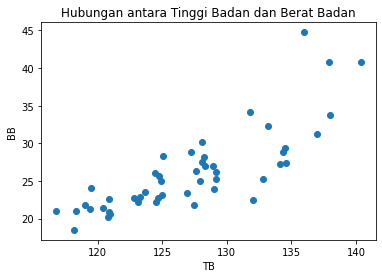

In [48]:
import matplotlib.pyplot as plt
# Mengambil variabel tinggi badan dan berat badan
tinggi_badan = df['TB']
berat_badan = df['BB']

# Membuat scatter plot
plt.scatter(tinggi_badan, berat_badan)
plt.xlabel('TB')
plt.ylabel('BB')
plt.title('Hubungan antara Tinggi Badan dan Berat Badan')
plt.show()

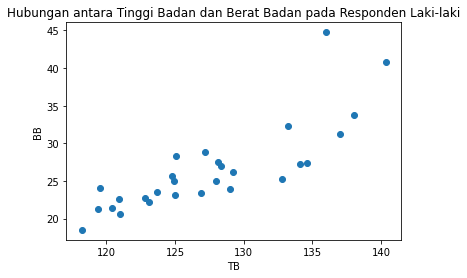

In [52]:
# Mengambil data dari responden pria
data_pria = df[df['Jenis_Kelamin'] == 'Laki-laki']

# Mengambil variabel tinggi badan dan berat badan pada responden pria
tinggi_badan_pria = data_pria['TB']
berat_badan_pria = data_pria['BB']

# Membuat scatter plot
plt.scatter(tinggi_badan_pria, berat_badan_pria)
plt.xlabel('TB')
plt.ylabel('BB')
plt.title('Hubungan antara Tinggi Badan dan Berat Badan pada Responden Laki-laki')
plt.show()

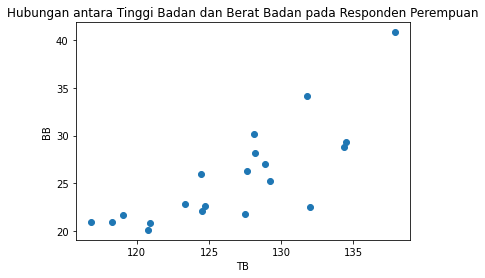

In [55]:
# Mengambil data dari responden perempuan
data_perempuan = df[df['Jenis_Kelamin'] == 'Perempuan']

# Mengambil variabel tinggi badan dan berat badan pada responden perempuan
tinggi_badan_perempuan = data_perempuan['TB']
berat_badan_perempuan = data_perempuan['BB']

# Membuat scatter plot
plt.scatter(tinggi_badan_perempuan, berat_badan_perempuan)
plt.xlabel('TB')
plt.ylabel('BB')
plt.title('Hubungan antara Tinggi Badan dan Berat Badan pada Responden Perempuan')
plt.show()

# Epidemiologi Hipotiroid

## Deskripsi

Repositori ini berisi data dan analisis terkait dengan epidemiologi hipotiroid. Data yang digunakan berasal dari sumber [sumber data] dan mencakup informasi mengenai faktor risiko, gejala, dan prevalensi hipotiroid dalam populasi tertentu.

## Struktur Direktori

- `data/`: Folder ini berisi data mentah yang digunakan dalam analisis.
- `notebooks/`: Folder ini berisi notebook Jupyter yang berisi analisis dan pemodelan data.
- `results/`: Folder ini berisi hasil analisis, seperti visualisasi dan ringkasan data.

## Panduan Penggunaan

1. Klone repositori ini ke komputer Anda dengan perintah: `git clone <URL_Repositori_GitHub>`.
2. Instal semua dependensi yang diperlukan dengan menjalankan: `<perintah_instalasi_dependensi>`.
3. Anda dapat menjalankan notebook Jupyter yang ada di folder `notebooks/` untuk melihat dan menjalankan analisis yang telah dilakukan.
4. Hasil analisis dan visualisasi dapat ditemukan di folder `results/`.

## Kontribusi

Kontribusi terhadap repositori ini sangat diterima. Jika Anda ingin melakukan perbaikan atau menambahkan fitur baru, ikuti langkah-langkah berikut:

1. Fork repositori ini.
2. Buat branch baru dengan perubahan Anda: `git checkout -b nama-branch`.
3. Lakukan perubahan yang diperlukan.
4. Commit perubahan Anda: `git commit -m "Deskripsi perubahan"`.
5. Dorong perubahan ke branch yang baru saja dibuat: `git push origin nama-branch`.
6. Ajukan pull request melalui Git
